# **LAB 3 - PART 1 SVM Kernel Hard Prediction**

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### **Read csv file**

In [382]:
### START CODE HERE ###

df = pd.read_csv("data_sample.csv", header=0)

df
### END CODE HERE ###

,Target,Radius,Texture
0,1,2.5,4.1
1,0,1.2,3.8
2,1,5.0,1.4
3,0,3.1,2.9
4,1,4.3,5.2
5,1,3.8,6.1
6,1,2.8,4.2
7,0,2.2,3.4


#### **Split the data for Train and Test**
First 5 rows for train and the rest for test.

In [383]:
### START CODE HERE ###
train = df.head(5) #5แถวแรก
test = df[5:]

### END CODE HERE ###

Split targets and feature as y and x respectively.
- `y` : `Target`
- `x` : `Radius,Texture`

In [384]:
### START CODE HERE ###
Y_train = train['Target ']
X_train = train[['Radius','Texture']]
Y_test = test['Target ']
X_test = test[['Radius','Texture']]

### END CODE HERE ###

In [385]:
X_test = np.array(X_test)
X_test

array([[3.8, 6.1],
       [2.8, 4.2],
       [2.2, 3.4]])

### **Create and observe the kernel behavior**

Here is the kernel function.
$$K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2)$$
After obtaining the kernel values, you will perform a 3D visualization of $(x_1,x_2,K_i)$.

**Create the function that return all kernels as a list.**

In [386]:
def matrix_calculate_kernel(x,x_train):
    kernels = []
    gamma = 1
    ### START CODE HERE ###
    
    for i in x_train.values:
        kernel_value = np.exp(-gamma * ((x['Radius'] - i[0])**2 + (x['Texture'] - i[1])**2))
        kernels.append(kernel_value)
        
    ### END CODE HERE ###
    return kernels



<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

It is not necessary to print the output like this. Simply compare the values obtained with the expected results.
- Kernel 1 :`[1.00000000e+00 1.68638147e-01 1.31720301e-06 1.65298888e-01 1.16785670e-02]`
- Kernel 2 :`[1.68638147e-01 1.00000000e+00 1.68752986e-09 1.20342323e-02 9.44523667e-06]`
- Kernel 3 :`[1.31720301e-06 1.68752986e-09 1.00000000e+00 2.85124368e-03 3.28082741e-07]`
- Kernel 4 :`[0.16529889 0.01203423 0.00285124 1.         0.00119453]`
- Kernel 5 :`[1.16785670e-02 9.44523667e-06 3.28082741e-07 1.19453296e-03 1.00000000e+00]`

</details>



In [387]:
matrix_calculate_kernel(X_train,X_train)

[0    1.000000
 1    0.168638
 2    0.000001
 3    0.165299
 4    0.011679
 dtype: float64,
 0    1.686381e-01
 1    1.000000e+00
 2    1.687530e-09
 3    1.203423e-02
 4    9.445237e-06
 dtype: float64,
 0    1.317203e-06
 1    1.687530e-09
 2    1.000000e+00
 3    2.851244e-03
 4    3.280827e-07
 dtype: float64,
 0    0.165299
 1    0.012034
 2    0.002851
 3    1.000000
 4    0.001195
 dtype: float64,
 0    1.167857e-02
 1    9.445237e-06
 2    3.280827e-07
 3    1.194533e-03
 4    1.000000e+00
 dtype: float64]

Use the weight ($\theta_{1-n}$) and bias ($\theta_{0}$) base on your activity last.

In [388]:
### START CODE HERE ###
kernels = matrix_calculate_kernel(X_train,X_train)
w = [0.9, -0.5, 0.9, -0.5, 0.9]
b = -0.3

kernels = np.array(kernels)
kernels
### END CODE HERE ###

array([[1.00000000e+00, 1.68638147e-01, 1.31720301e-06, 1.65298888e-01,
        1.16785670e-02],
       [1.68638147e-01, 1.00000000e+00, 1.68752986e-09, 1.20342323e-02,
        9.44523667e-06],
       [1.31720301e-06, 1.68752986e-09, 1.00000000e+00, 2.85124368e-03,
        3.28082741e-07],
       [1.65298888e-01, 1.20342323e-02, 2.85124368e-03, 1.00000000e+00,
        1.19453296e-03],
       [1.16785670e-02, 9.44523667e-06, 3.28082741e-07, 1.19453296e-03,
        1.00000000e+00]])

Create the `compare_3dplot` function to plot difference raw kernels $(x_1,x_2,K_i)$ and weighted kernels $(x_1,x_2,\theta_i K_i)$.<br>
**NOTE** : Plot as subplots, and in each subplot, also plot $(x_1,x_2,0)$  with a different color to visualize the $(x_1,x_2)$ before applying the kernel.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- There is a parameter : `projection='3d'`
</details>

<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

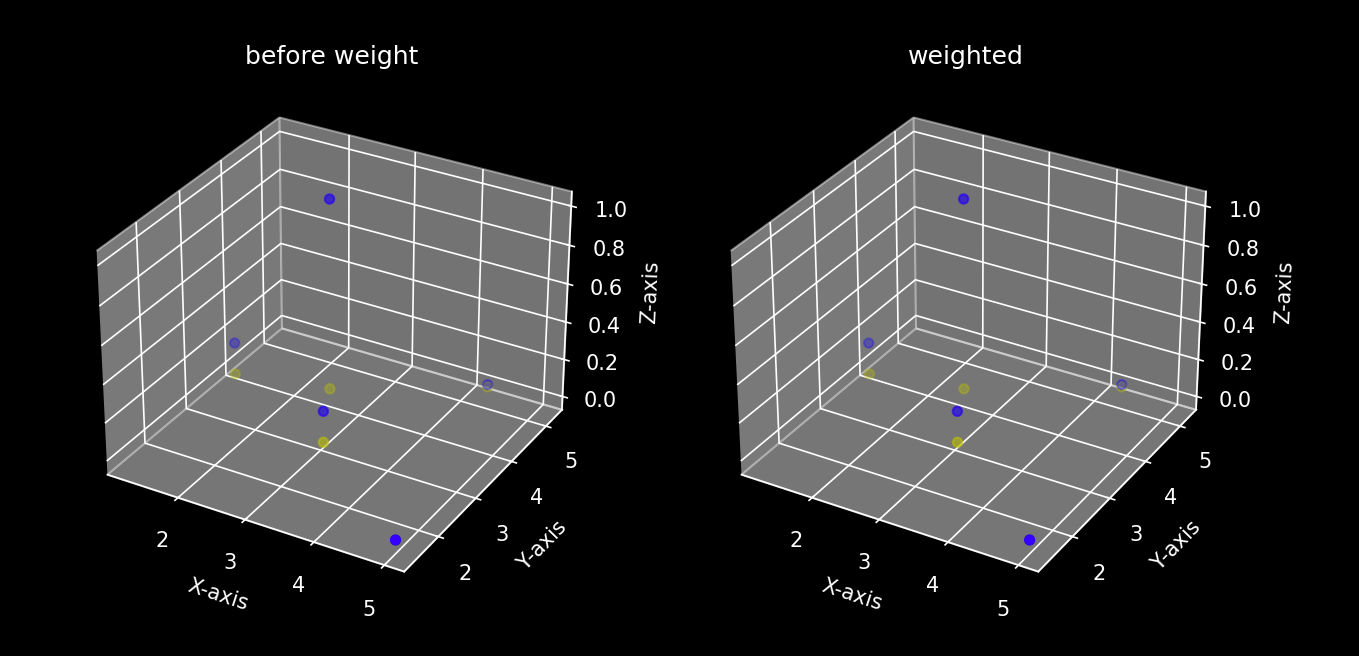

</details>


In [389]:
def compare_3dplot(x_train,kernels,w):
    """
    Parameters:
    - x_train (numpy.ndarray): The input training data.
    - kernels (numpy.ndarray): The array of kernel values.
    - w (float): The weight parameter.
    """
    ### START CODE HERE ###
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), subplot_kw={'projection': '3d'})

    # Scatterplot before applying weights
    axes[0].scatter(x_train[:, 0], x_train[:, 1], kernels, c='blue')
    
    # Scatterplot after applying weights
    axes[1].scatter(x_train[:, 0], x_train[:, 1], w * kernels, c='red')


    plt.tight_layout()
    plt.show()
    
    ### END CODE HERE ###

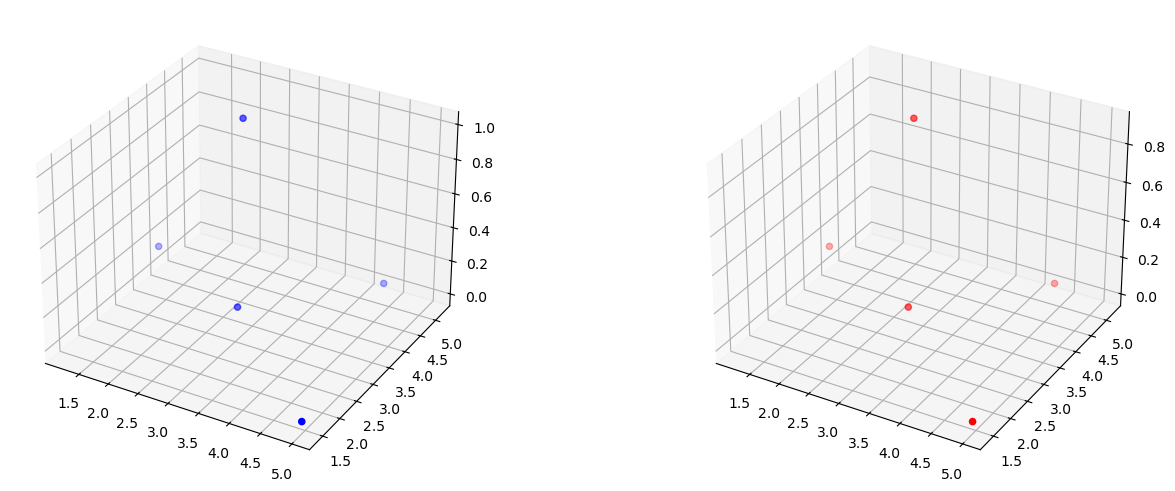

In [390]:
X_train = X_train.to_numpy()
# w = [w]
compare_3dplot(X_train,kernels[0],w[0])
# w[0]

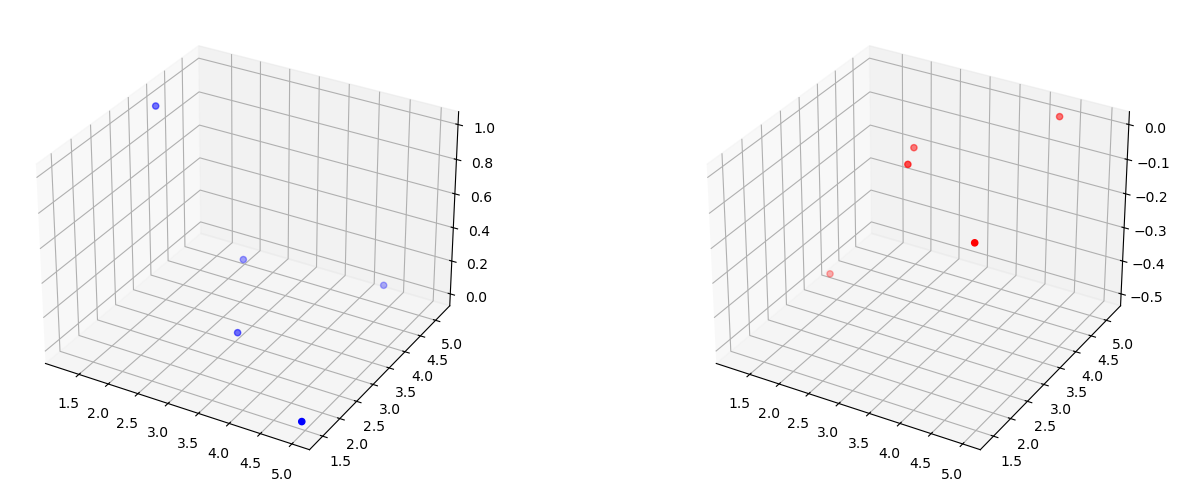

In [391]:
compare_3dplot(X_train,kernels[1],w[1])

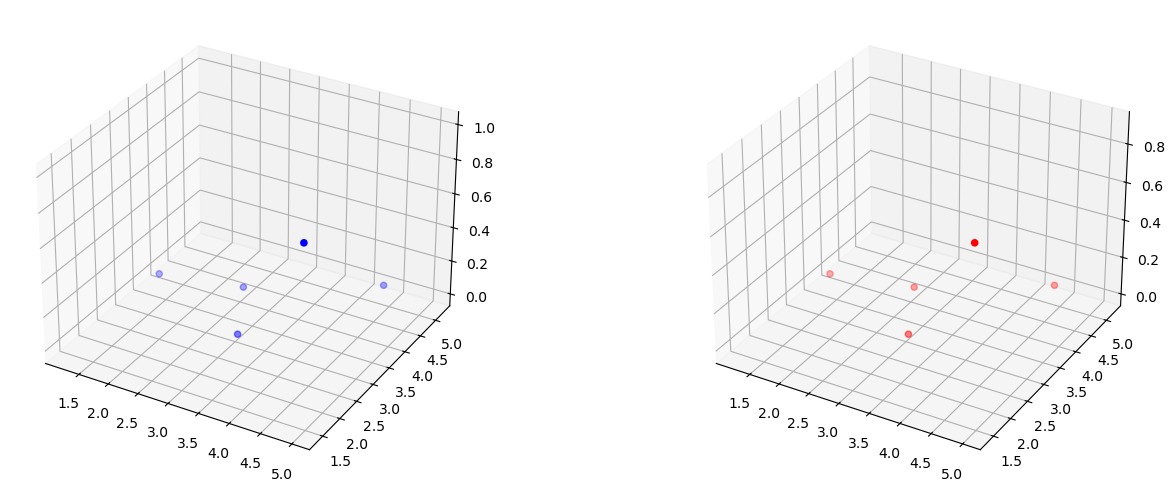

In [392]:
compare_3dplot(X_train,kernels[2],w[2])

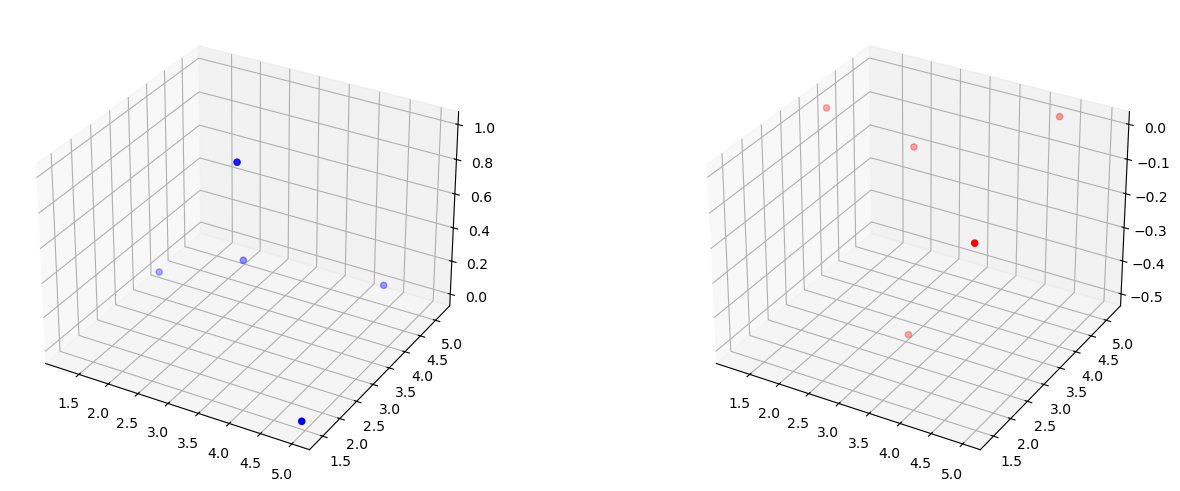

In [393]:
compare_3dplot(X_train,kernels[3],w[3])

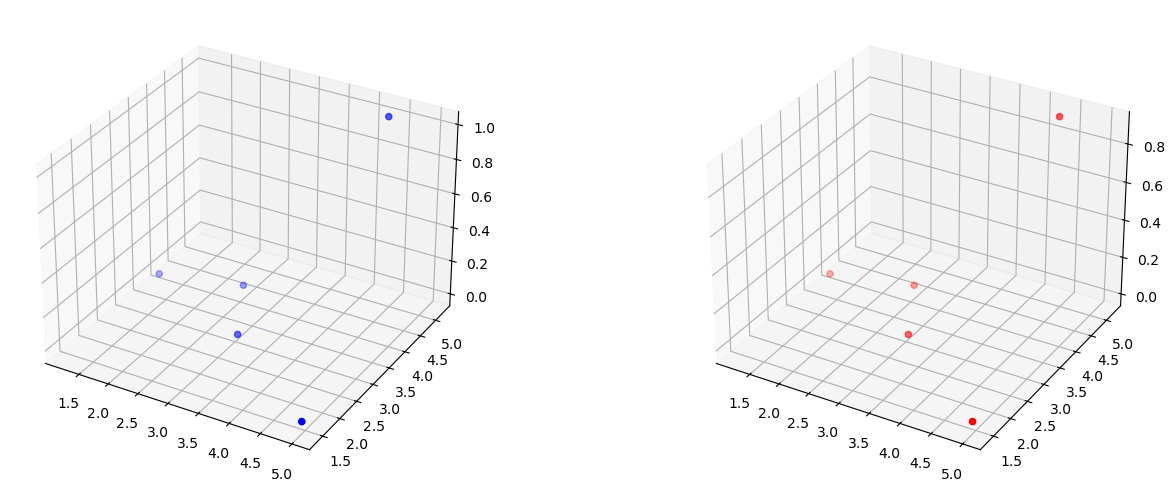

In [394]:
compare_3dplot(X_train,kernels[4],w[4])

### **SVM decision function**
Create the SVM decision function that return the predicted class.
$$
K_i(x_j,x_i) = exp(-\gamma||x_j-x_i||^2) \\
h(X) = \sum_{i=1}^N\theta_i K_i + \theta_0\\

\hat{Y} =
\begin{cases}
    1 &  h \geq 0 \\
    0 & \text{otherwise}
\end{cases}

$$


In [395]:
kernels_list = []
kernels_row = []
for i in range(len(X_test)):
        for j in range(len(X_train)):
                kernels = np.exp(-1 * ((X_test[i][0] - X_train[j][0])**2 + (X_test[i][1] - X_train[j][1])**2))
                kernels_row.append(kernels)
        kernels_list.append(kernels_row)
        kernels_row = []
    
    # Calculate the decision function value
print(w)
h_list = []
for i in range(len(X_test)):
        h = np.dot(w, kernels_list[i]) + b
        h_list.append(h)
print(h_list)
pred_class = []



[0.9, -0.5, 0.9, -0.5, 0.9]
[0.01483800142891134, 0.43199681391955885, -0.125627536711358]


In [396]:
print(X_test)
print(X_train)

[[3.8 6.1]
 [2.8 4.2]
 [2.2 3.4]]
[[2.5 4.1]
 [1.2 3.8]
 [5.  1.4]
 [3.1 2.9]
 [4.3 5.2]]


In [397]:
def svm_decision_function(X, X_train, w, b, gamma=1):
    """
    Predict the class of the input x using an SVM decision function.

    Parameters:
    - x (numpy.ndarray): The input data for prediction.
    - x_train (numpy.ndarray): The training data.
    - w (numpy.ndarray): The weight vector.
    - b (float): The bias term.
    - gamma (float): The gamma parameter for the RBF kernel (default is 1).

    Returns:
    - int: The predicted class (0 or 1).
    """
    
    ### START CODE HERE ###

    # Calculate the kernel values between x and x_train
    kernels_list = []
    kernels_row = []
    for i in range(len(X)):
            for j in range(len(X_train)):
                    kernels = np.exp(-1 * ((X[i][0] - X_train[j][0])**2 + (X[i][1] - X_train[j][1])**2))
                    kernels_row.append(kernels)
            kernels_list.append(kernels_row)
            kernels_row = []
    
    # Calculate the decision function value
    h_list = []
    for i in range(len(X_test)):
            h = np.dot(w, kernels_list[i]) + b
            h_list.append(h)
    # Predict the class
    # pred_class = 1 if h >= 0 else 0
    pred_class = []
    for i in range(len(h_list)):
        if h_list[i]>= 0:
            pred_y = 1
            pred_class.append(pred_y)
        else:
            pred_y = 0
            pred_class.append(pred_y)
    


    ### END CODE HERE ###
    return pred_class

# ใช้งาน svm_decision_function โดยไม่ใช้การแพ็คข้อมูล
y_test_predict = svm_decision_function(X_test, X_train, w, b, gamma=1)


### **Confusion matrix**
Create the confusion matrix from your prediction. Then, calculate the precision and recall values.<br><br>
<span style='color: red;'>**NOTE** : From scratch only.</span>


|            | Predicted Negative | Predicted Positive |
|------------|--------------------|--------------------|
| **Actual Negative** | True Negative (TN) | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP) |


$\text{Precision} = \frac{TP}{TP + FP}$

$\text{Recall} = \frac{TP}{TP + FN}$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.</br>

```
Confusion Matrix:
[[1 0]
[0 2]]
Precision: 1.0
Recall: 1.0
```

</details>

In [398]:
### START CODE HERE ###
def confusion_matrix(actual, predicted):
    
    actual = np.array(actual)
    predicted = np.array(predicted)
    TP = np.sum((actual == 1) & (predicted == 1))
    FP = np.sum((actual == 0) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))
    TN = np.sum((actual == 0) & (predicted == 0))
    # print(actual)
    # print(predicted)
    return np.array([[TN, FP], [FN, TP]])

def precision_recall(conf_matrix):
    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    return precision, recall

# Calculate confusion matrix, precision, and recall for test data
conf_matrix_test = confusion_matrix(Y_test, y_test_predict)
precision_test, recall_test = precision_recall(conf_matrix_test)

print("\nConfusion Matrix (Test Data):")
print(conf_matrix_test)
print("\nPrecision (Test Data):", precision_test)
print("Recall (Test Data):", recall_test)


### END CODE HERE ###


Confusion Matrix (Test Data):
[[1 0]
 [0 2]]

Precision (Test Data): 1.0
Recall (Test Data): 1.0


### Question
1. What would happen if we choose fewer support vectors (number of kernels)?
2. If weights are changed to w = [0.2, 0.4, 0.1, -0.2, 0.6], what impact would this have on the classification results, and what is the underlying reason for the changes? 

1. โมเดลจะใช้ข้อมูลน้อยกว่าเพื่อทำการจำแนกข้อมูล ทำให้มีโอกาสลดประสิทธิภาพในการทำนาย แต่ก็ช่วยลดความซับซ้อนของการทำนายด้วยเช่นกัน
2. ทำให้ค่า Target ที่ทำนายออกมาเปลี่ยนไปและไม่ตรงกับค่าที่ควรจะเป็นเนื่องจากมีการเปลี่ยนค่า w ส่งผลให้การคำนวณค่าต่างไปจากเดิม เปลี่ยนค่า Kernel ต่างๆทำให้ขอบเขตของโมเดลผิดไปจากเดิม